In [1]:
# Import libraries
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import shapiro, kstest
import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Data Exploration

In [2]:
# Read in ESC matrix
ESC = pd.read_csv('ESC_new.csv', index_col=0)
#ESC

# Read in chr_lengths matrix
chr_len = pd.read_csv('chr_lengths_new.csv')
#chr_len

In [3]:
# Read in other matrices
OSN0 = pd.read_csv('OSN0.csv', header = None)
OSN1 = pd.read_csv('OSN1.csv', header = None)
OSN4 = pd.read_csv('OSN4.csv', header = None)
OSN12 = pd.read_csv('OSN12.csv', header = None)
SE105 = pd.read_csv('SE105.csv', header = None)

In [4]:
# Set row and column names for other matrices
names = [f"{i}m" for i in range(1, 20)] + [f"{i}p" for i in range(1, 20)]
dataframes = [OSN0, OSN1, OSN4, OSN12, SE105]

for df in dataframes:
    df.index = names
    df.columns = names

In [5]:
OSN0

,1m,2m,3m,4m,5m,6m,7m,8m,9m,10m,...,10p,11p,12p,13p,14p,15p,16p,17p,18p,19p
1m,0.0,1030.0,407.0,689.0,1351.0,848.0,1247.0,1135.0,305.0,686.0,...,869.0,2013.0,650.0,565.0,612.0,454.0,698.0,870.0,644.0,878.0
2m,1030.0,0.0,489.0,629.0,1488.0,793.0,1142.0,1304.0,206.0,384.0,...,590.0,1766.0,463.0,400.0,611.0,354.0,554.0,906.0,531.0,597.0
3m,407.0,489.0,0.0,298.0,770.0,363.0,459.0,626.0,174.0,312.0,...,361.0,861.0,360.0,278.0,377.0,274.0,179.0,411.0,371.0,390.0
4m,689.0,629.0,298.0,0.0,1334.0,779.0,1101.0,1112.0,225.0,560.0,...,356.0,1336.0,399.0,331.0,375.0,269.0,430.0,664.0,379.0,459.0
5m,1351.0,1488.0,770.0,1334.0,0.0,978.0,1189.0,1223.0,399.0,941.0,...,1013.0,2535.0,726.0,849.0,990.0,698.0,938.0,930.0,747.0,647.0
6m,848.0,793.0,363.0,779.0,978.0,0.0,745.0,710.0,280.0,607.0,...,751.0,1480.0,552.0,595.0,459.0,384.0,545.0,674.0,683.0,501.0
7m,1247.0,1142.0,459.0,1101.0,1189.0,745.0,0.0,1240.0,425.0,1018.0,...,744.0,2076.0,863.0,811.0,535.0,723.0,765.0,988.0,532.0,1070.0
8m,1135.0,1304.0,626.0,1112.0,1223.0,710.0,1240.0,0.0,430.0,630.0,...,878.0,1979.0,949.0,720.0,828.0,845.0,671.0,871.0,630.0,772.0
9m,305.0,206.0,174.0,225.0,399.0,280.0,425.0,430.0,0.0,157.0,...,189.0,671.0,210.0,92.0,241.0,71.0,226.0,399.0,174.0,303.0
10m,686.0,384.0,312.0,560.0,941.0,607.0,1018.0,630.0,157.0,0.0,...,367.0,1420.0,509.0,331.0,422.0,299.0,611.0,631.0,532.0,933.0


### Data Wrangling

In [6]:
# Convert chr_len into a vector

# Take the logarithm of every value in the dataframe
chr_len = np.log(chr_len)

# Extract the values from the dataframe
values = chr_len.iloc[0]

# Function to generate the vector with sums 
def generate_chromosome_vector(values):
    vector = []
    for i in range(len(values)):
        for j in range(i + 1, len(values)):
            sum_value = values[i] + values[j]
            vector.append(sum_value)
    return vector

# Generate the vector
chr_vec = generate_chromosome_vector(values)

# Print the result
#for item in chr_vec:
    #print(item)

In [7]:
# Define function to convert matrix into vector
def matrix_to_values(matrix):
    values = []
    rows = matrix.shape[0]  # Number of rows
    cols = matrix.shape[1]  # Number of columns

    for i in range(rows):
        for j in range(i + 1, cols):  # Ensure j > i to avoid duplicates
            # Append only the value to the values list
            values.append(matrix.iloc[i, j])

    return values

In [8]:
# Use function on all matrices
v1 = matrix_to_values(ESC)
v2 = matrix_to_values(OSN0)
v3 = matrix_to_values(OSN1)
v4 = matrix_to_values(OSN4)
v5 = matrix_to_values(OSN12)
v6 = matrix_to_values(SE105)
v7 = chr_vec

In [9]:
# Take the natural logarithm (log) of each vector
log_y = np.log(v1)
log_v2 = np.log(v2)
log_v3 = np.log(v3)
log_v4 = np.log(v4)
log_v5 = np.log(v5)
log_v6 = np.log(v6)

In [10]:
#Create X matrix for linear regression
data = {
    'OSN0': log_v2,
    'OSN1': log_v3,
    'OSN4': log_v4,
    'OSN12': log_v5,
    'SE105': log_v6,
    'Chr_len': v7
}

X = pd.DataFrame(data, index=None)
X

,OSN0,OSN1,OSN4,OSN12,SE105,Chr_len
0,6.937314,7.205635,7.500529,6.584791,7.384610,38.111067
1,6.008813,6.490724,5.945421,6.927558,6.816736,37.981860
2,6.535241,7.435438,6.561031,6.795706,6.967909,37.959546
3,7.208600,6.428105,6.907755,6.974479,6.927558,37.959546
4,6.742881,6.986566,6.120297,6.566672,6.291569,37.915316
...,...,...,...,...,...,...
698,6.204558,5.594711,5.823046,5.899897,5.187386,36.725693
699,6.347389,5.525453,6.291569,6.086775,6.415097,36.336030
700,5.820083,6.257668,5.416100,5.537334,4.983607,36.692350
701,6.529419,6.144186,6.415097,5.459586,6.216606,36.302688


In [11]:
#Create X1 matrix for collinearity check
data = {
    'ESC' : log_y,
    'OSN0': log_v2,
    'OSN1': log_v3,
    'OSN4': log_v4,
    'OSN12': log_v5,
    'SE105': log_v6,
    'Chr_len': v7
}

X1 = pd.DataFrame(data, index=None)
#X1

In [12]:
# Save the X DataFrame to a CSV file
#X.to_csv('X_matrix.csv', index=False)

### Data Visualisation

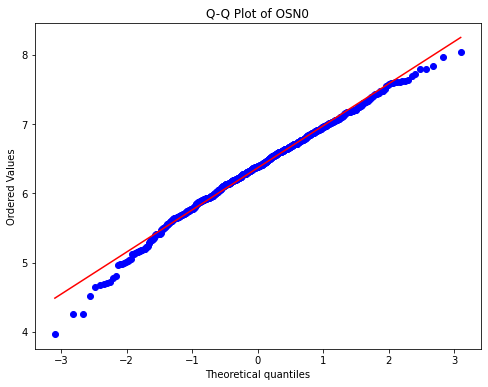

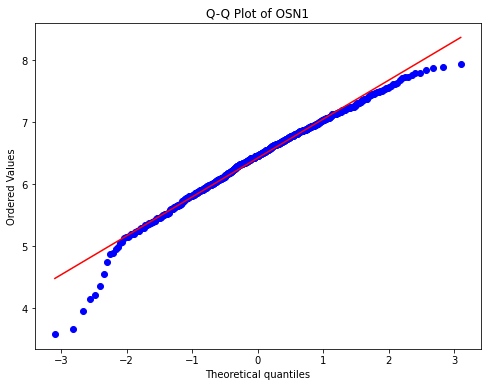

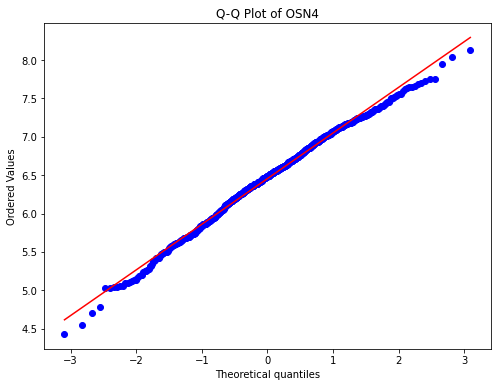

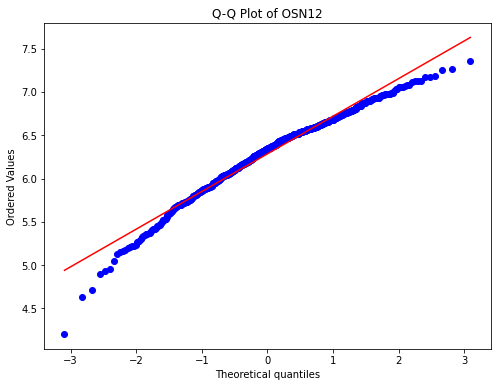

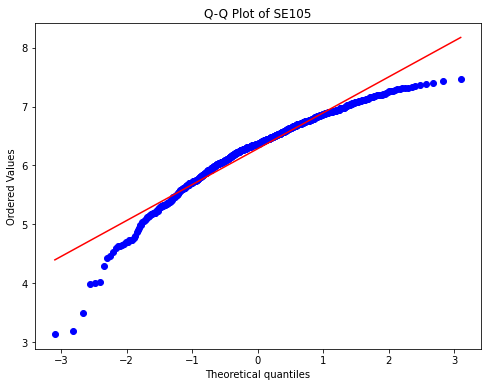

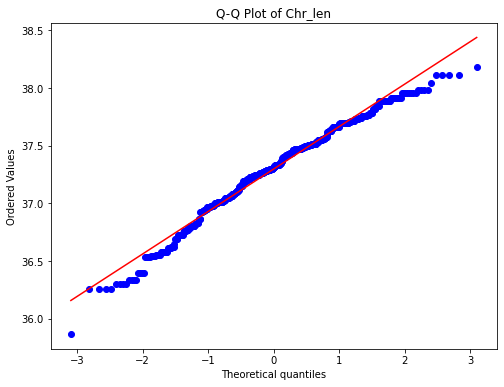

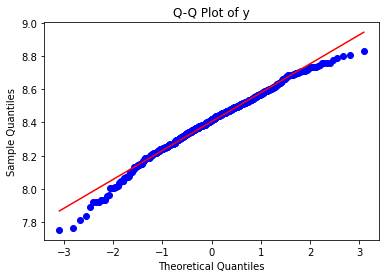

In [13]:
# Create Q-Q Plots

# Individual plots
for column in X.columns:
    plt.figure(figsize=(8, 6))
    stats.probplot(X[column], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {column}')
    plt.show()
    
# Create the Q-Q plot
stats.probplot(log_y, dist="norm", plot=plt)
plt.title('Q-Q Plot of y')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')

# Save the plot as a JPG file 
#plt.savefig('QQ_y.jpg', dpi=300)
plt.show()

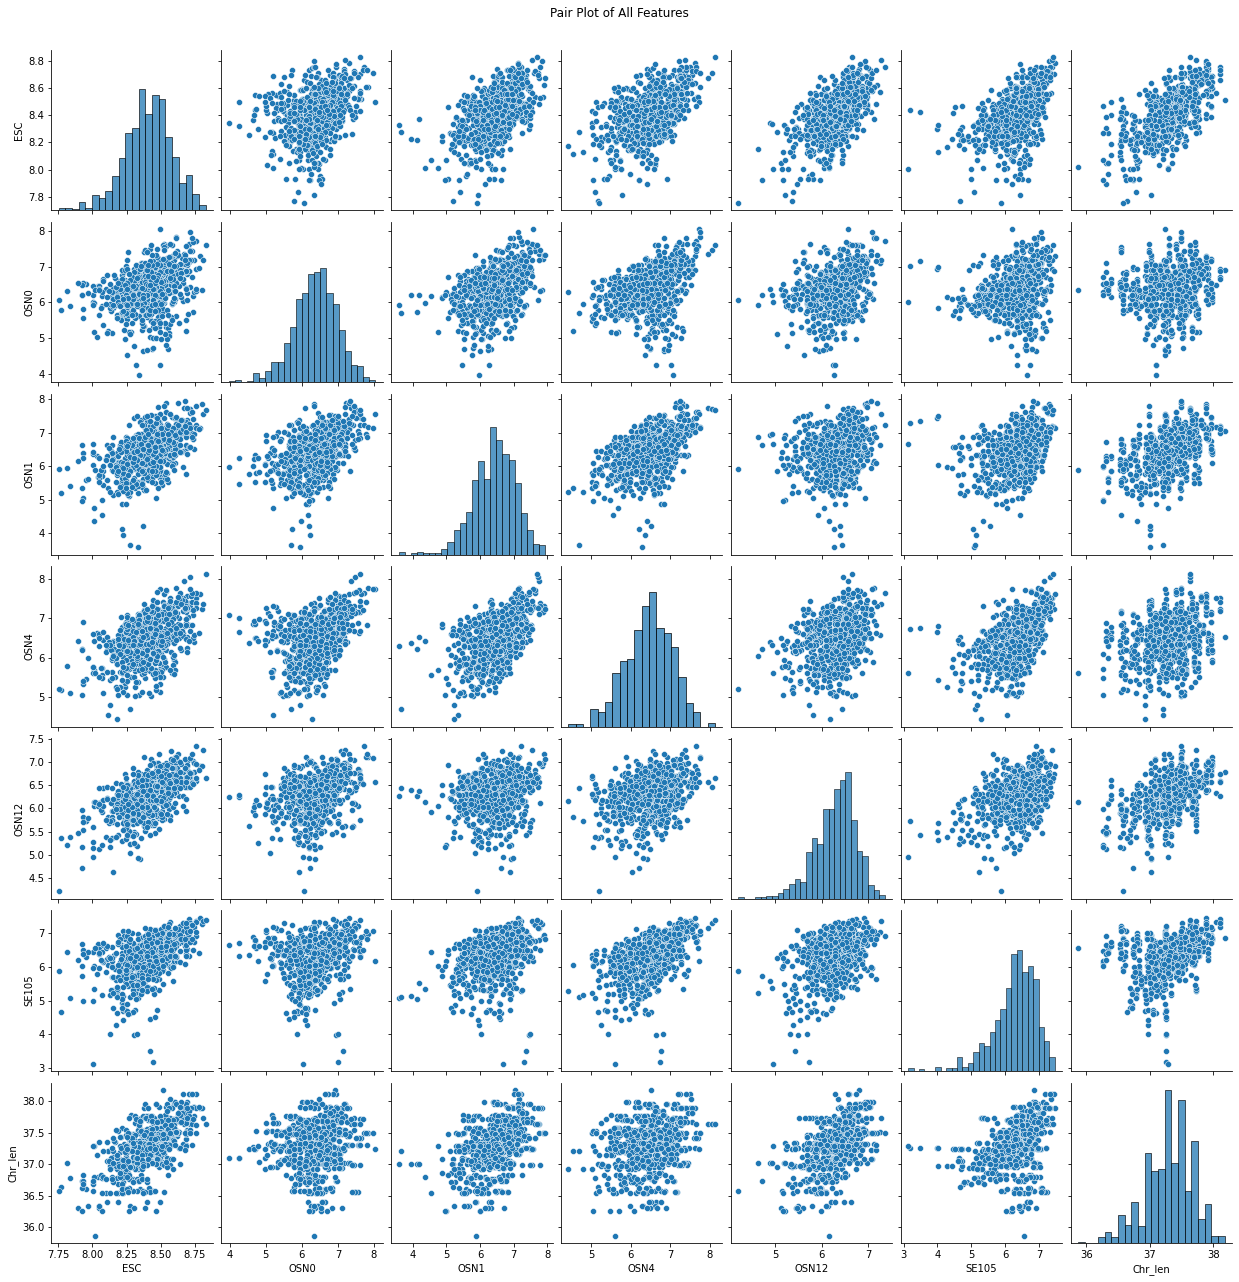

In [14]:
# Create Pair plots
sns.pairplot(X1)
plt.suptitle('Pair Plot of All Features', y=1.02)
# Save the plot as a PNG file with higher resolution (dpi)
plt.savefig('pairplot.jpg', dpi=300)
plt.show()

### Correlation Analysis

In [15]:
# Correlation
correlations = X1.corr()
print(correlations)

              ESC      OSN0      OSN1      OSN4     OSN12     SE105   Chr_len
ESC      1.000000  0.333723  0.514500  0.507493  0.596199  0.484384  0.645353
OSN0     0.333723  1.000000  0.434310  0.383323  0.336061  0.182621  0.122821
OSN1     0.514500  0.434310  1.000000  0.538647  0.183580  0.331344  0.435797
OSN4     0.507493  0.383323  0.538647  1.000000  0.314480  0.513991  0.265016
OSN12    0.596199  0.336061  0.183580  0.314480  1.000000  0.415482  0.524983
SE105    0.484384  0.182621  0.331344  0.513991  0.415482  1.000000  0.337802
Chr_len  0.645353  0.122821  0.435797  0.265016  0.524983  0.337802  1.000000


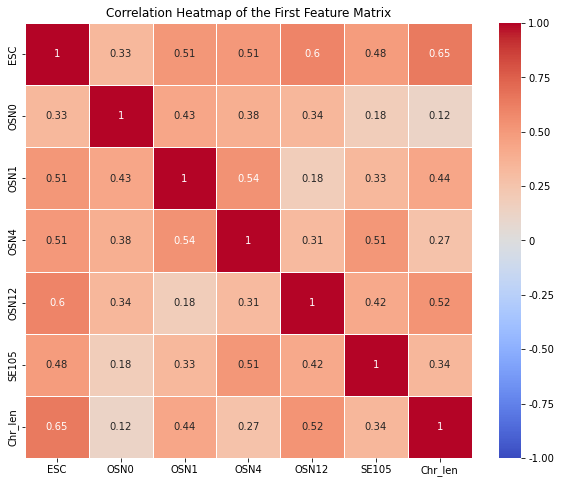

In [16]:
# Plot Heatmap

plt.figure(figsize=(10, 8))  # Set the size of the heatmap
heatmap = sns.heatmap(correlations, annot=True, cmap='coolwarm', linewidths=0.5, center=0, vmin=-1, vmax=1)

# Create a custom colorbar with the desired ticks
colorbar = heatmap.collections[0].colorbar
colorbar.set_ticks([-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1])
colorbar.set_ticklabels(['-1.00', '-0.75', '-0.50', '-0.25', '0', '0.25', '0.50', '0.75', '1.00'])

# Add title and show plot
plt.title('Correlation Heatmap of the First Feature Matrix')
#plt.savefig('first_corr_hm.jpg', dpi=300)
plt.show()

In [17]:
# Perform K-S and S-W tests for normality check

ks_results = {}
sw_results = {}

for column in X.columns:
    ks_statistic, ks_p_value = stats.kstest(X[column], 'norm', args=(X[column].mean(), X[column].std()))
    sw_statistic, sw_p_value = stats.shapiro(X[column])
    ks_results[column] = (ks_statistic, ks_p_value)
    sw_results[column] = (sw_statistic, sw_p_value)

# Print test results
print("K-S Test Results:")
for column, result in ks_results.items():
    print(f"{column}: Statistic={result[0]:.3f}, p-value={result[1]:.3f}")

print("\nS-W Test Results:")
for column, result in sw_results.items():
    print(f"{column}: Statistic={result[0]:.3f}, p-value={result[1]:.3f}")

K-S Test Results:
OSN0: Statistic=0.035, p-value=0.333
OSN1: Statistic=0.045, p-value=0.112
OSN4: Statistic=0.032, p-value=0.439
OSN12: Statistic=0.062, p-value=0.008
SE105: Statistic=0.088, p-value=0.000
Chr_len: Statistic=0.067, p-value=0.003

S-W Test Results:
OSN0: Statistic=0.992, p-value=0.001
OSN1: Statistic=0.981, p-value=0.000
OSN4: Statistic=0.995, p-value=0.012
OSN12: Statistic=0.975, p-value=0.000
SE105: Statistic=0.939, p-value=0.000
Chr_len: Statistic=0.982, p-value=0.000


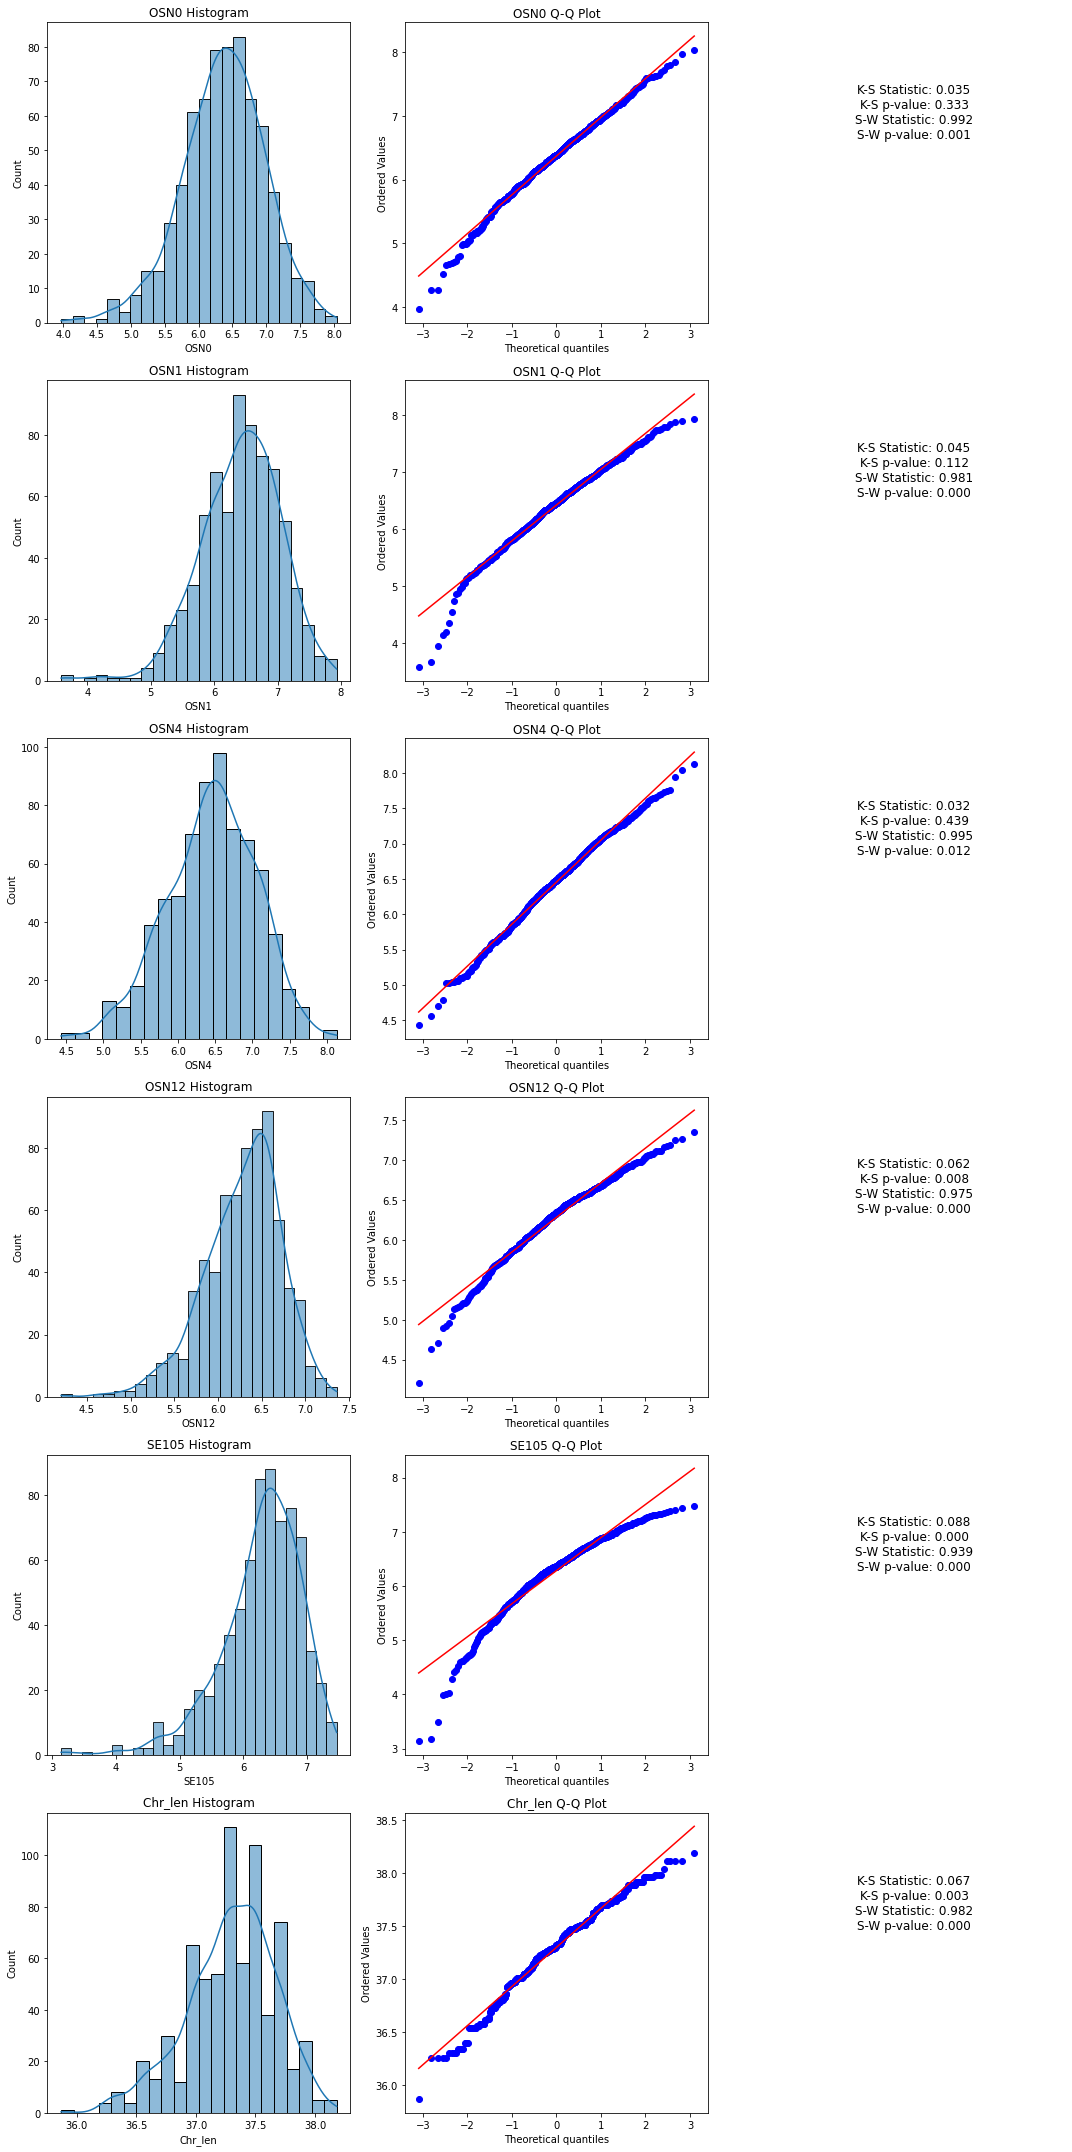

In [18]:
# Create visualizations
num_features = len(X.columns)
num_plots = num_features * 3  # 3 plots per feature (histogram, Q-Q plot, annotations)

fig, axes = plt.subplots(num_features, 3, figsize=(15, 5 * num_features))

for i, column in enumerate(X.columns):
    # Histogram with KDE
    sns.histplot(X[column], kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'{column} Histogram')

    # Q-Q Plot
    stats.probplot(X[column], dist="norm", plot=axes[i, 1])
    axes[i, 1].set_title(f'{column} Q-Q Plot')

    # Annotations for test results
    ks_stat, ks_p = ks_results[column]
    sw_stat, sw_p = sw_results[column]
    axes[i, 2].text(0.5, 0.7, f'K-S Statistic: {ks_stat:.3f}\nK-S p-value: {ks_p:.3f}\nS-W Statistic: {sw_stat:.3f}\nS-W p-value: {sw_p:.3f}',
                    fontsize=12, ha='center', va='center', transform=axes[i, 2].transAxes)
    axes[i, 2].axis('off')

# Hide unused subplots
for j in range(num_features, len(axes)):
    axes.flatten()[j].axis('off')

plt.tight_layout()

# Save the plot as a PNG file with higher resolution (dpi)
plt.savefig('QQ_features_KSSW_test.jpg', dpi=300)

plt.show()

### Regression Analysis

In [19]:
# Apply Linear Regression

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, log_y, test_size=0.2, random_state=47)

# Add constant to X for intercept
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

# Fit the model
model_sm = sm.OLS(y_train, X_train_sm).fit()

# Get coefficients and confidence intervals
coefficients = model_sm.params
conf_int = model_sm.conf_int()
p_values = model_sm.pvalues

# Predict on training and test set
y_pred_train_sm = model_sm.predict(X_train_sm)
y_pred_test_sm = model_sm.predict(X_test_sm)

# Print summary of the model
print(model_sm.summary())

# Calculate R-squared for training and test set
r2_train = r2_score(y_train, y_pred_train_sm)
r2_test = r2_score(y_test, y_pred_test_sm)

# Calculate MSE for training and test set
mse_train = mean_squared_error(y_train, y_pred_train_sm)
mse_test = mean_squared_error(y_test, y_pred_test_sm)

print(f"Training R-squared: {r2_train:.4f}")
print(f"Test R-squared: {r2_test:.4f}")
print(f"Training MSE: {mse_train:.2f}")
print(f"Test MSE: {mse_test:.2f}")

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.620
Method:                 Least Squares   F-statistic:                     153.5
Date:                Sun, 18 Aug 2024   Prob (F-statistic):          2.04e-114
Time:                        22:09:11   Log-Likelihood:                 465.95
No. Observations:                 562   AIC:                            -917.9
Df Residuals:                     555   BIC:                            -887.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1831      0.568      2.085      0.0

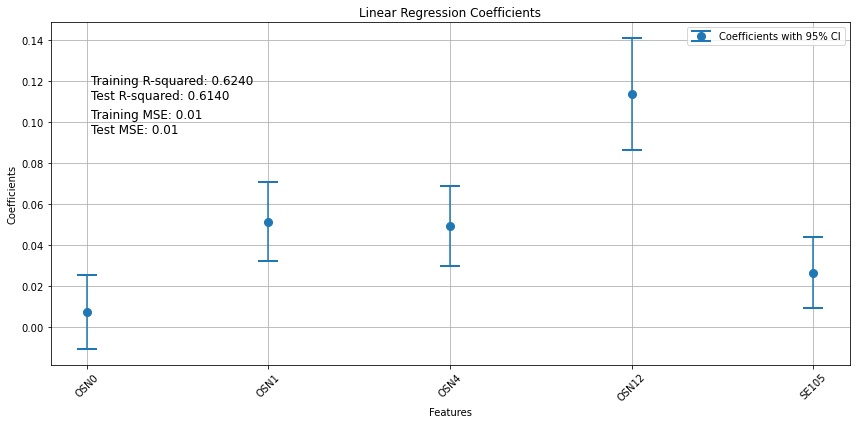

In [20]:
# Plot coefficients with confidence intervals excluding 'Chr_len'
plt.figure(figsize=(12, 6))

# Exclude 'Chr_len' and the constant term from plotting
plot_coeffs = coefficients.drop(index=['Chr_len', 'const'])
plot_conf_int = conf_int.drop(index=['Chr_len', 'const'])

# Coefficients plot
plt.errorbar(plot_coeffs.index, plot_coeffs.values, 
             yerr=(plot_coeffs - plot_conf_int[0], plot_conf_int[1] - plot_coeffs),
             fmt='o', markersize=8, capsize=10, capthick=2, label='Coefficients with 95% CI')

# Annotations for R-squared and MSE
plt.text(0.05, 0.85, f"Training R-squared: {r2_train:.4f}\nTest R-squared: {r2_test:.4f}",
         transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.text(0.05, 0.75, f"Training MSE: {mse_train:.2f}\nTest MSE: {mse_test:.2f}",
         transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

# Other plot configurations
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.title('Linear Regression Coefficients')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

In [21]:
# Use Random Forest with X and y

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, log_y, test_size=0.3, random_state=0)

# Initialize and train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate metrics for training data
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Calculate metrics for test data
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print metrics
print(f'Training Mean Squared Error: {train_mse:.2f}')
print(f'Training R-squared: {train_r2:.2f}')
print(f'Test Mean Squared Error: {test_mse:.2f}')
print(f'Test R-squared: {test_r2:.2f}')

# Feature importance
feature_importances = model.feature_importances_
features = X.columns

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print feature importances
print('Feature Importances:')
print(importance_df)

Training Mean Squared Error: 0.00
Training R-squared: 0.95
Test Mean Squared Error: 0.01
Test R-squared: 0.64
Feature Importances:
   Feature  Importance
5  Chr_len    0.339031
3    OSN12    0.201781
2     OSN4    0.136757
4    SE105    0.136148
0     OSN0    0.097516
1     OSN1    0.088768


### Feature Importance

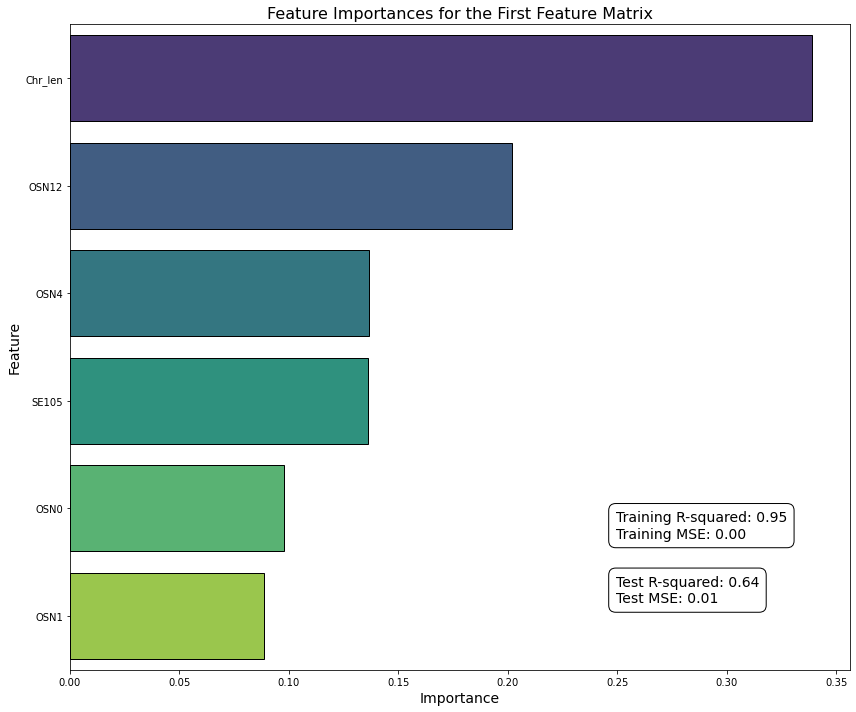

In [22]:
# Plot feature importances 
plt.figure(figsize=(12, 10))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis', edgecolor='black')

plt.title('Feature Importances for the First Feature Matrix', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)

# Add text boxes with evaluation metrics at the bottom of the plot
plt.text(0.7, 0.2, f'Training R-squared: {train_r2:.2f}\nTraining MSE: {train_mse:.2f}',
         transform=plt.gca().transAxes, fontsize=14, verticalalignment='bottom',
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

plt.text(0.7, 0.1, f'Test R-squared: {test_r2:.2f}\nTest MSE: {test_mse:.2f}',
         transform=plt.gca().transAxes, fontsize=14, verticalalignment='bottom',
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

# Show the plot
plt.tight_layout()
#plt.savefig('first_matrix_importance.jpg', dpi=300, bbox_inches='tight')
plt.show()


In [23]:
pip install shap

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/rds/bear-apps/2021b/EL8-ice/software/Python/3.9.6-GCCcore-11.2.0/bin/python3.9 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


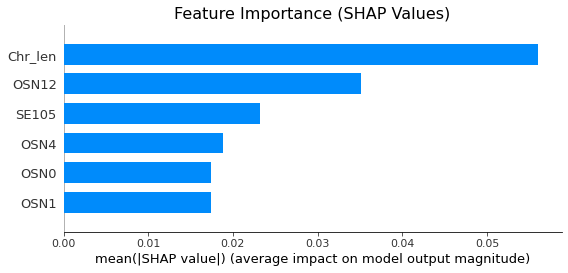

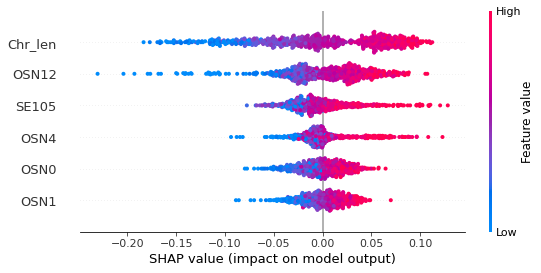

In [24]:
import shap

# Initialize the SHAP explainer
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

# Plot the summary of SHAP values
plt.figure(figsize=(10, 8))
shap.summary_plot(shap_values, X, plot_type="bar", show=False)
plt.title('Feature Importance (SHAP Values)', fontsize=16)
plt.tight_layout()

# Save the plot as a JPEG file with higher resolution (dpi)
#plt.savefig('SHAP.jpg', dpi=300)
plt.show()

# Create the SHAP summary plot
shap.summary_plot(shap_values, X, show=False)

# Save the plot
#plt.savefig('first_shap_summary_plot.jpg', dpi=300, bbox_inches='tight')
plt.show()  

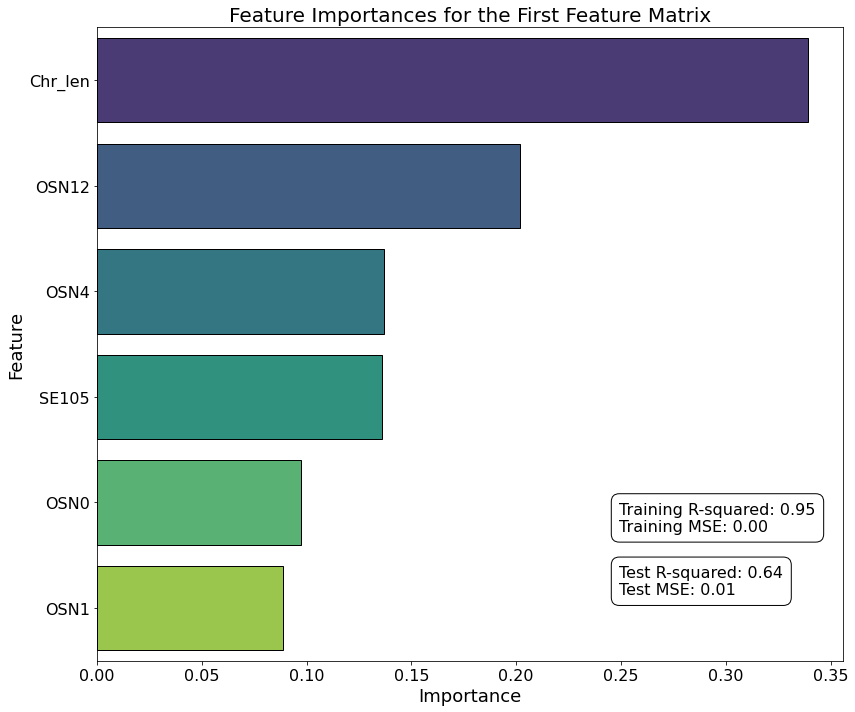

In [27]:
# Plot feature importances 
plt.figure(figsize=(12, 10))

# Increase font size for the bar plot
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis', edgecolor='black')

# Set title and axis labels with increased font size
plt.title('Feature Importances for the First Feature Matrix', fontsize=20)
plt.xlabel('Importance', fontsize=18)
plt.ylabel('Feature', fontsize=18)

# Increase font size of the feature names on the y-axis
plt.yticks(fontsize=16)
# Increase font size of the importance values on the x-axis
plt.xticks(fontsize=16)

# Add text boxes with evaluation metrics at the bottom of the plot
plt.text(0.7, 0.2, f'Training R-squared: {train_r2:.2f}\nTraining MSE: {train_mse:.2f}',
         transform=plt.gca().transAxes, fontsize=16, verticalalignment='bottom',
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

plt.text(0.7, 0.1, f'Test R-squared: {test_r2:.2f}\nTest MSE: {test_mse:.2f}',
         transform=plt.gca().transAxes, fontsize=16, verticalalignment='bottom',
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

# Show the plot with the adjusted layout
plt.tight_layout()
plt.savefig('Top_5_first_matrix_importance.jpg', dpi=300, bbox_inches='tight')
plt.show()
